In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline


/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [24]:
class TimeSeriesData():
    def __init__(self, num_points,xmin,xmax):
        
        self.xmin = xmin
        self.xmax = xmax
        self.num_points = num_points
        self.resolution = (xmax - xmin) / num_points
        self.x_data = np.linspace(xmin , xmax , num_points)
        self.y_true = np.sin(self.x_data)
        
    def ret_true(self , x_series):
        return np.sin(x_series)
    def next_batch(self , batch_size , steps , return_batch_ts = False):
        #Grab random start points
        rand_start = np.random.rand(batch_size,1)
        
        #Since starting points may not be a part of curve, make it a part of the curve
        ts_start = rand_start * (self.xmax - self.xmin - (steps*self.resolution))
        
        #Create batch time series on X-axis
        batch_ts = ts_start + np.arange(0.0,steps+1) * self.resolution
        
        #Take sine of X-values
        y_batch = np.sin(batch_ts)
        
        if return_batch_ts:
            return y_batch[ : , :-1 ].reshape(-1,steps,1) , y_batch[ : , 1:].reshape(-1,steps,1) , batch_ts
        else:
            return y_batch[ : , :-1 ].reshape(-1,steps,1) , y_batch[ : , 1:].reshape(-1,steps,1)
        

In [25]:
ts_data = TimeSeriesData(250 , 0 ,10)

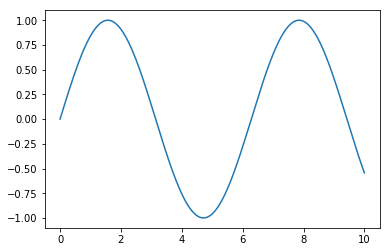

In [26]:
plt.plot(ts_data.x_data , ts_data.y_true)

In [27]:
time_steps = 30

In [35]:
y1,y2,ts = ts_data.next_batch(1 ,time_steps , True)

In [29]:
ts.shape

(1, 31)

In [30]:
ts.flatten()

array([7.01674195, 7.05674195, 7.09674195, 7.13674195, 7.17674195,
       7.21674195, 7.25674195, 7.29674195, 7.33674195, 7.37674195,
       7.41674195, 7.45674195, 7.49674195, 7.53674195, 7.57674195,
       7.61674195, 7.65674195, 7.69674195, 7.73674195, 7.77674195,
       7.81674195, 7.85674195, 7.89674195, 7.93674195, 7.97674195,
       8.01674195, 8.05674195, 8.09674195, 8.13674195, 8.17674195,
       8.21674195])

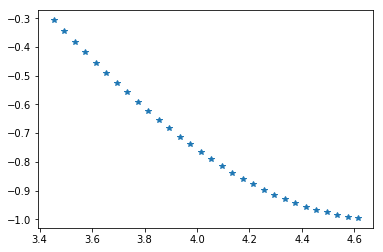

In [36]:
plt.plot(ts.flatten()[1:] , y2.flatten(), '*')

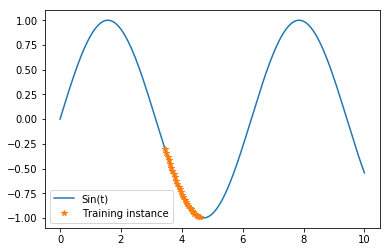

In [37]:
plt.plot(ts_data.x_data , ts_data.y_true,label = 'Sin(t)')
plt.plot(ts.flatten()[1:] , y2.flatten(), '*' , label = 'Training instance')
plt.legend()

In [42]:
#TRAINING DATA

train_inst = np.linspace(5 , 5 + ts_data.resolution*(time_steps + 1) , time_steps + 1)
train_inst


array([5.        , 5.04133333, 5.08266667, 5.124     , 5.16533333,
       5.20666667, 5.248     , 5.28933333, 5.33066667, 5.372     ,
       5.41333333, 5.45466667, 5.496     , 5.53733333, 5.57866667,
       5.62      , 5.66133333, 5.70266667, 5.744     , 5.78533333,
       5.82666667, 5.868     , 5.90933333, 5.95066667, 5.992     ,
       6.03333333, 6.07466667, 6.116     , 6.15733333, 6.19866667,
       6.24      ])

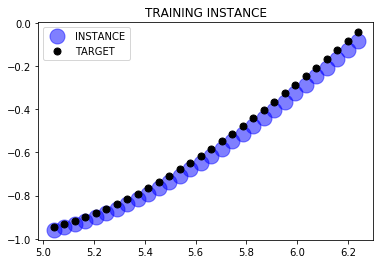

In [51]:
plt.title('TRAINING INSTANCE')
plt.plot(train_inst[1:],ts_data.ret_true(train_inst[:-1]) ,'bo' , markersize=15,alpha = 0.5 , label = 'INSTANCE')
plt.plot(train_inst[1:],ts_data.ret_true(train_inst[1:]) ,'ko' , markersize=7,label = 'TARGET')
plt.legend()